In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [2]:
# 問題1 keras_tutorial.ipynbで実装

In [3]:
# 問題3 ris 2値分類

# データセットの読み込み
df = pd.read_csv("data/Iris.csv")

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
# ラベルを数値に変換
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [40]:
# モデル
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(4),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])

In [5]:
# 損失関数
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [7]:
%%time
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5312
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5312
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.5625
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.8125
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.9062
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7969
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.6562
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.5477 - accuracy: 0.7656
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.8594
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.9375
Epoch 11/20
2/2 [======================

In [8]:
model.evaluate(X_test,  y_test, verbose=2)

1/1 - 0s - loss: 0.3986 - accuracy: 0.9000 - 125ms/epoch - 125ms/step


[0.3985688090324402, 0.8999999761581421]

In [9]:
pred = model(X_test).numpy()
print(pred)
# 確率に変換
pred = tf.nn.softmax(pred).numpy()
pred

[[ 8.4543973e-01  2.2222129e-01]
 [-1.5889244e-01  1.1105576e+00]
 [ 9.6498692e-01  1.6922157e-01]
 [-5.0018513e-01  1.4206216e+00]
 [ 8.9202002e-02  9.2801642e-01]
 [-2.5421178e-01  1.1948478e+00]
 [ 5.6961352e-01  3.8500720e-01]
 [ 2.4421419e-01  6.7056310e-01]
 [-4.1538289e-01  1.2752447e+00]
 [ 1.7217284e-01  8.1322753e-01]
 [-2.3437351e-01  1.0875815e+00]
 [-2.3719572e-01  1.0304973e+00]
 [-3.8420421e-01  1.2130740e+00]
 [ 6.3074440e-01  3.5484037e-01]
 [ 1.0710127e+00 -1.6933444e-01]
 [ 9.0247881e-01  1.6835649e-02]
 [ 2.4368589e-01  6.3810068e-01]
 [ 1.1846950e+00 -7.7705294e-02]
 [ 7.3714741e-04  8.4149599e-01]
 [ 1.0272990e+00  6.7061245e-02]]


array([[0.6509502 , 0.34904984],
       [0.21935143, 0.7806486 ],
       [0.6890679 , 0.31093207],
       [0.12777163, 0.87222844],
       [0.30178455, 0.6982155 ],
       [0.19014633, 0.8098536 ],
       [0.5460209 , 0.45397905],
       [0.39499846, 0.60500145],
       [0.15569332, 0.84430665],
       [0.34500816, 0.65499187],
       [0.2104932 , 0.78950673],
       [0.21965241, 0.7803476 ],
       [0.16836238, 0.8316376 ],
       [0.56854177, 0.43145823],
       [0.77562445, 0.22437558],
       [0.7079902 , 0.29200974],
       [0.40265498, 0.597345  ],
       [0.77943903, 0.22056098],
       [0.301375  , 0.698625  ],
       [0.72316945, 0.27683058]], dtype=float32)

In [10]:
print(np.argmax(pred, axis=1))
print(y_test.reshape(len(y_test)))
display("3つ不正解がある")

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


'3つ不正解がある'

In [11]:
# 問題4 iris 3種類分類

# データセットの読み込み
df = pd.read_csv("data/Iris.csv")

# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)

y = np.array(pd.get_dummies(df["Species"]))

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [12]:
# モデル
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(4),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)
])
# 損失関数 (OHEしてない場合使う)
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# OHEしてる場合はこちら
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
# 以下でもよい
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
%%time
model.fit(X_train, y_train, batch_size=30, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4/4 [==============================] - 0s 42ms/step - loss: 1.1380 - accuracy: 0.2812 - val_loss: 0.9665 - val_accuracy: 0.3750
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 0.9436 - accuracy: 0.3646 - val_loss: 0.8459 - val_accuracy: 0.7083
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.8184 - accuracy: 0.7708 - val_loss: 0.7698 - val_accuracy: 0.7083
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 0.7424 - accuracy: 0.7812 - val_loss: 0.6709 - val_accuracy: 0.9167
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.7396 - val_loss: 0.6111 - val_accuracy: 0.7083
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.5920 - accuracy: 0.6875 - val_loss: 0.5530 - val_accuracy: 0.7083
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.5259 - accuracy: 0.6979 - val_loss: 0.4992 - val_accuracy: 0.7083
Epoch 8/10
4/4 [=================

In [14]:
model.evaluate(X_test,  y_test, verbose=2)
pred = model(X_test).numpy()
# print(pred)
# 確率に変換
pred = tf.nn.softmax(pred).numpy()
# print(pred)
print(np.argmax(pred, axis=1))
print(np.argmax(y_test, axis=1))
display("1と2二体する誤分類が多いように見える")

1/1 - 0s - loss: 0.4320 - accuracy: 0.7667 - 16ms/epoch - 16ms/step
[2 1 0 2 0 2 0 1 2 1 2 1 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


'1と2二体する誤分類が多いように見える'

In [15]:
# 問題5 houe Price
from sklearn.preprocessing import StandardScaler
# データセットの読み込み
df = pd.read_csv("data/housing/train.csv")

# データフレームから条件抽出
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
y = y[:, np.newaxis]

# 標準化
standardScaler_y = StandardScaler()
standardScaler_X = StandardScaler()
y = standardScaler_y.fit_transform(y)
X = standardScaler_X.fit_transform(X)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:
# モデル
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
loss_fn = tf.keras.losses.MeanSquaredError()
model.compile(optimizer='adam', loss=loss_fn, metrics=['mse'])
# model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [17]:
%%time
model.fit(X_train, y_train, batch_size=30, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4564 - mse: 0.4564 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3219 - mse: 0.3219 - val_loss: 0.2353 - val_mse: 0.2353
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3156 - mse: 0.3156 - val_loss: 0.2294 - val_mse: 0.2294
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3109 - mse: 0.3109 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3108 - mse: 0.3108 - val_loss: 0.2230 - val_mse: 0.2230
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3082 - mse: 0.3082 - val_loss: 0.2228 - val_mse: 0.2228
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3115 - mse: 0.3115 - val_loss: 0.2215 - val_mse: 0.2215
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3056 - mse: 0.30

10/10 - 0s - loss: 0.4568 - mse: 0.4568 - 23ms/epoch - 2ms/step


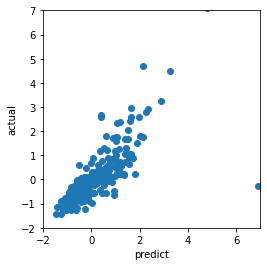

'大体同じ位置に散文している'

In [18]:
model.evaluate(X_test,  y_test, verbose=2)
pred = model(X_test).numpy()

# plot
plt.xlabel("predict")
plt.ylabel("actual")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-2,7)
plt.ylim(-2,7)
plt.scatter(pred, y_test)
plt.show()
display("大体同じ位置に散文している")

In [19]:
# 問題6 MNIST
# 問題5
# データセットの読み込み
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
# データフレームから条件抽出

# 0 1スケールに変更
X_train = X_train / 255
X_test = X_test / 255

# y次元変換
ohe = OneHotEncoder()

y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.transform(y_test).toarray()
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

X_train:  (60000, 28, 28)
X_test:  (10000, 28, 28)
y_train:  (60000, 10)
y_test:  (10000, 10)


In [20]:
# モデル
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
# 損失関数 (OHEしてない場合使う)
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# OHEしてる場合はこちら
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
# 以下でもよい
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
%%time
model.fit(X_train, y_train, batch_size=30, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2622 - accuracy: 0.9237 - val_loss: 0.1376 - val_accuracy: 0.9588
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1129 - accuracy: 0.9652 - val_loss: 0.1235 - val_accuracy: 0.9603
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0777 - accuracy: 0.9760 - val_loss: 0.0958 - val_accuracy: 0.9719
Epoch 4/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0604 - accuracy: 0.9801 - val_loss: 0.0900 - val_accuracy: 0.9728
Epoch 5/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9846 - val_loss: 0.1006 - val_accuracy: 0.9690
Epoch 6/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0896 - val_accuracy: 0.9758
Epoch 7/10
1600/1600 [==============================] - 2s 2ms/step - loss: 0.0314 - accuracy: 0.9895 - val_loss: 0.0964 - val_accuracy:

In [22]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1037 - accuracy: 0.9757 - 324ms/epoch - 1ms/step


[0.10374914854764938, 0.9757000207901001]

In [23]:
# 問題7 pytorch iris2分割
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [24]:
# データセットの読み込み
df = pd.read_csv("data/Iris.csv")

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
# ラベルを数値に変換
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
# y[y == "Iris-setosa"] = 2
y = y.astype(np.int64)


# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

# torchでtensorに変換してdataset作成
# train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
# test_dataset = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

X_train:  (80, 4)
y_train:  (80,)


In [25]:
# batch_size = 1
batch_size = 10

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [26]:
for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}", "--", X[0])
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([10, 4]) -- tensor([5.0000, 2.3000, 3.3000, 1.0000])
Shape of y: torch.Size([10]) torch.int64


In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 50),
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 2)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
#         return nn.functional.log_softmax(logits, dim = 1)

model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=2, bias=True)
  )
)


In [28]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
#         X, y = Variable(X), Variable(y)

        # Compute prediction error
        pred = model(X)
#         print("pred: ", pred)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [29]:
epochs = 10
for t in range(epochs):
    print("Epoch {}".format(t + 1))
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1
loss: 0.680894  [    0/   80]
Test Error: 
 Accuracy: 50.0%, Avg loss: 0.658904 

Epoch 2
loss: 0.653356  [    0/   80]
Test Error: 
 Accuracy: 60.0%, Avg loss: 0.638312 

Epoch 3
loss: 0.629608  [    0/   80]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.619749 

Epoch 4
loss: 0.608441  [    0/   80]
Test Error: 
 Accuracy: 80.0%, Avg loss: 0.601311 

Epoch 5
loss: 0.587216  [    0/   80]
Test Error: 
 Accuracy: 80.0%, Avg loss: 0.582632 

Epoch 6
loss: 0.565632  [    0/   80]
Test Error: 
 Accuracy: 80.0%, Avg loss: 0.563293 

Epoch 7
loss: 0.543148  [    0/   80]
Test Error: 
 Accuracy: 80.0%, Avg loss: 0.541993 

Epoch 8
loss: 0.519266  [    0/   80]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.521837 

Epoch 9
loss: 0.496296  [    0/   80]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.501243 

Epoch 10
loss: 0.472824  [    0/   80]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.480378 



In [30]:
# 問題7 pytorch iris3分割

# データセットの読み込み
df = pd.read_csv("data/Iris.csv")

# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
# ラベルを数値に変換
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y[y == "Iris-setosa"] = 2
y = y.astype(np.int64)


# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

# torchでtensorに変換してdataset作成
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# batch_size = 1
batch_size = 10

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

X_train:  (120, 4)
y_train:  (120,)


In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 50),
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 3)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
#         return nn.functional.log_softmax(logits, dim = 1)

model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=3, bias=True)
  )
)


In [32]:
epochs = 10
for t in range(epochs):
    print("Epoch {}".format(t + 1))
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1
loss: 1.203792  [    0/  120]
loss: 0.976244  [  100/  120]
Test Error: 
 Accuracy: 80.0%, Avg loss: 0.916719 

Epoch 2
loss: 0.938624  [    0/  120]
loss: 0.862796  [  100/  120]
Test Error: 
 Accuracy: 90.0%, Avg loss: 0.786017 

Epoch 3
loss: 0.840360  [    0/  120]
loss: 0.755089  [  100/  120]
Test Error: 
 Accuracy: 90.0%, Avg loss: 0.666957 

Epoch 4
loss: 0.748185  [    0/  120]
loss: 0.665221  [  100/  120]
Test Error: 
 Accuracy: 90.0%, Avg loss: 0.571876 

Epoch 5
loss: 0.672283  [    0/  120]
loss: 0.598751  [  100/  120]
Test Error: 
 Accuracy: 93.3%, Avg loss: 0.501543 

Epoch 6
loss: 0.616125  [    0/  120]
loss: 0.550471  [  100/  120]
Test Error: 
 Accuracy: 93.3%, Avg loss: 0.449775 

Epoch 7
loss: 0.574765  [    0/  120]
loss: 0.512561  [  100/  120]
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.409420 

Epoch 8
loss: 0.543256  [    0/  120]
loss: 0.481514  [  100/  120]
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.376055 

Epoch 9
loss: 0.517417  [    0/  120]
lo

In [33]:
# 問題8 pytorch housing price

# 問題4
from sklearn.preprocessing import StandardScaler
# データセットの読み込み
df = pd.read_csv("data/housing/train.csv")

# データフレームから条件抽出
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
y = y[:, np.newaxis]

# 標準化
standardScaler_y = StandardScaler()
standardScaler_X = StandardScaler()
y = standardScaler_y.fit_transform(y)
X = standardScaler_X.fit_transform(X)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# batch_size = 1
batch_size = 100

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 50),
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            print(f"loss: {loss:>7f}")
            loss = loss.item()

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [35]:
%%time
epochs = 10
for t in range(epochs):
    print("Epoch {}".format(t + 1))
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1
loss: 0.972410
loss: 0.442261
Test Error: 
 Avg loss: 0.631962 

Epoch 2
loss: 0.450852
loss: 0.268567
Test Error: 
 Avg loss: 0.463429 

Epoch 3
loss: 0.288351
loss: 0.234846
Test Error: 
 Avg loss: 0.440371 

Epoch 4
loss: 0.257448
loss: 0.228221
Test Error: 
 Avg loss: 0.440865 

Epoch 5
loss: 0.252436
loss: 0.224075
Test Error: 
 Avg loss: 0.442458 

Epoch 6
loss: 0.250909
loss: 0.220700
Test Error: 
 Avg loss: 0.444104 

Epoch 7
loss: 0.250314
loss: 0.217597
Test Error: 
 Avg loss: 0.445338 

Epoch 8
loss: 0.249909
loss: 0.215070
Test Error: 
 Avg loss: 0.446435 

Epoch 9
loss: 0.249556
loss: 0.212739
Test Error: 
 Avg loss: 0.447379 

Epoch 10
loss: 0.249250
loss: 0.211022
Test Error: 
 Avg loss: 0.448460 

CPU times: user 578 ms, sys: 16.8 ms, total: 594 ms
Wall time: 154 ms


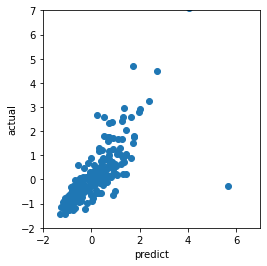

'大体同じ位置に散文している'

In [36]:
pred = model.forward(X_test)

# tensor to numpy
pred = pred.to('cpu').detach().numpy().copy()
# plot
plt.xlabel("predict")
plt.ylabel("actual")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-2,7)
plt.ylim(-2,7)
plt.scatter(pred, y_test)
plt.show()
display("大体同じ位置に散文している")

In [37]:
# 問題7 pytorch mnist
# データセットの読み込み
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
# データフレームから条件抽出

# 0 1スケールに変更
X_train = X_train / 255
X_test = X_test / 255

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# batch_size = 1
batch_size = 100

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

X_train:  (60000, 28, 28)
X_test:  (10000, 28, 28)


In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 50),
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
#         return nn.functional.log_softmax(logits, dim = 1)

model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [39]:
%%time
epochs = 10
for t in range(epochs):
    print("Epoch {}".format(t + 1))
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1
Test Error: 
 Accuracy: 79.7%, Avg loss: 0.816263 

Epoch 2
Test Error: 
 Accuracy: 88.6%, Avg loss: 0.416382 

Epoch 3
Test Error: 
 Accuracy: 90.3%, Avg loss: 0.346746 

Epoch 4
Test Error: 
 Accuracy: 91.1%, Avg loss: 0.313544 

Epoch 5
Test Error: 
 Accuracy: 91.9%, Avg loss: 0.291012 

Epoch 6
Test Error: 
 Accuracy: 92.5%, Avg loss: 0.273239 

Epoch 7
Test Error: 
 Accuracy: 92.8%, Avg loss: 0.258332 

Epoch 8
Test Error: 
 Accuracy: 93.2%, Avg loss: 0.245331 

Epoch 9
Test Error: 
 Accuracy: 93.4%, Avg loss: 0.233490 

Epoch 10
Test Error: 
 Accuracy: 93.6%, Avg loss: 0.222993 

CPU times: user 22.5 s, sys: 182 ms, total: 22.7 s
Wall time: 5.72 s


#### 問題8

1. 計算速度 (mnistの学習で比較、epochsは10)

tensorFlow: 54s
keras: 23.7s
pytorch: 5.65s

ただしまとめ記事ではkerasが最も遅いらしい。tensorFlowの実相が悪そう
    
pytorchが早い

2. コードの行数・可読性

tensorFlow: ニューラルネット層の定義は定義はしやすい。重み、バイアスの定義が必要。batchは自前実装。他二つで比べると最も行数が多い。numpyのまま入力できるのがわかやすい。
keras: 最もコード量が少ない。読みやすい。
pytorch: 上二つの間ぐらい。
    
keras. pytorchは独自の型にnumpyのデータをエンコード、デコードするのが厄介。またエンコード後のデータもイテレーターだからか確認しにくい。

3. 用意されている機能

tensorFlow: ニューラルネット層の定義、それぞれ損失値を出す関数が良いされてるが、学習ロジックは自分で組み立てる必要あり
keras: ニューラルネット層の定義, バッチ処理、epoch回数指定, 学習ロジック、損失値計算、データセット
pytorch: ニューラルネット層の定義, バッチ処理, それぞれ損失値を出す関数が良いされてるが、学習ロジックは自分で組み立てる必要あり


kerasが一番サクッと組めるが、細かい部分までカスタマイズしたい場合、pytorchが有効そう。
また、、学習経過などをさらに細かく独自にdebugしたい場合はkerasだとかなりラップされてるのでpytorchの方が良さそう。
GPU切り替えもpytorchの方が簡単らしい。